In [7]:
#ref:
#https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score,roc_auc_score
from sklearn.svm import SVC
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold

In [2]:

def plot_consufion_matrix(cm, classes, title = 'Confusion Matrix', normalize = False,cmap = plt.cm.Blues ):
        """
    This function plots the confusion matrix
    Args: cm - conusion matrix generated using sklearn
          classes - distinct labels of our data class
          normalize = Boolean for normalizing the matrix
          cmap - color maping of plot
          title- title for our plot
    Returns: None (Plots the conufsion matrix using matplotlib)
    """
    #Normalizes the values of matrix if we pass normalize=True
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.imshow(cm,interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            plt.text(j,i,cm[i][j], color = 'red', size = 'xx-large', ha = 'center',weight='extra bold')
    
    
def print_evaluation_report(y_test, y_pred, y_pred_proba):
    """This function prints the merices involved for evalutions of the model.
        It also calls the confusioj matrix plot function
    """
    
    cm = confusion_matrix(y_test, y_pred)
    #np.set_printoptions(precision=2)
    #print(cm)
    f1 = f1_score(y_test, y_pred, average='macro')
    auc = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred)
    
    print('F1 Score : %.2f' % f1)
    print('AUC ROC : %.2f' % auc)
    print('Precision : %.2f' % precision)
    
    classes = [0,1]
    plt.figure()
    plot_consufion_matrix(cm, classes,title = 'Confusion Matrix', normalize = False)
    plt.show()
    return
    
    
    

In [3]:
#reading the csv file of our dataset:
path = "/Users/saurabhraj/Desktop/CITY AI/Intro to AI/CW/Data"
df = pd.read_csv(path + "/data.csv")

In [3]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [8]:
def resample(df):
    """
    This function is responsible for splitting the data into multiple smaller balanced sets.
    Args: Dataframe of main data
    Returns: Dictionary containing multiple subsets of main datamframe
    """
    minor = len(df[df['Bankrupt?']==1])
    major = len(df[df['Bankrupt?']==0])
    df_major = df[df['Bankrupt?']==0]
    df_minor = df[df['Bankrupt?']==1]
    num_datasets = major//minor

    datasets = {}

    for ds in range(num_datasets):
        major_curr = df_major.iloc[ds*minor:(ds+1)*minor]

        curr_ds = pd.concat([major_curr, df_minor])
        datasets['df' + str(ds)] = curr_ds
        
    df0 = datasets['df0']
    print(len(datasets))
#     print(len(df0[df0['Bankrupt?']==1]))
#     print(len(df0[df0['Bankrupt?']==0]))
    return datasets


#### Now we have total 29 datasets which are balanced. So we will train ensemble models with 29 models.

In [9]:
def ensemble_decision_trees(datasets):
    """
    This function is responsible for creating multiple decision tree models. One for each dataset (ensemble).
    Args: a dictionary of resampled datasets.
    Returns: a dictionary of models corresponding to each dataset.
    """
    num_models = len(datasets)
    models = {}
    for i in range(num_models):
        df_curr = datasets['df' + str(i)]
        X_train = df_curr.drop(['Bankrupt?'], axis=1).values
        y_train = df_curr['Bankrupt?'].values
        
        dt = DecisionTreeClassifier(max_depth=40, criterion='entropy', min_samples_split=10).fit(X_train,y_train)
        
        models['DT' + str(i)] = dt
        
    return models


    

In [10]:
def findMajority(lst):
    """
    This function is responsible for implementing voting strategy to find out the final output.
    Args: Takes a list of predictions of all models in ensemble.
    Returns: The final class (0 or 1) based on voting.
    """
    
    one = 0
    zero = 0
    for v in lst:
        if v == 0:
            zero +=1
        elif v==1:
            one +=1
    if one>zero:
        return 1
    return 0
    

In [11]:
def predict_ensemble(models,X_test, y_test):
    """
    This function is responsible for predicting the output class for all models in ensemble.
    Args: Dictionary of models, X_test, Y_test
    Returns: Final output label (0 or 1), probability of output
    """
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_pred = []
    y_pred_proba = []
    
    num_models = len(models)
    for i in range(len(y_test)):
        x_curr = X_test[i].reshape(1,-1)
        votes = []
        y_proba_sum = 0
        for j in range(num_models):
            model_curr = models['DT' + str(j)]
            y_pred_curr = model_curr.predict(x_curr)
            y_proba_curr = model_curr.predict_proba(x_curr)[:,1]
            y_proba_sum += y_proba_curr
            votes.append(y_pred_curr)
            
        y_pred_i = findMajority(votes)
        y_proba_i = y_proba_sum/num_models
        
        y_pred.append(y_pred_i)
        y_pred_proba.append(y_proba_i[0])
    
    return y_pred, y_pred_proba
        

In [12]:
X = df.drop(['Bankrupt?'], axis=1)
y = df['Bankrupt?']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y)

In [13]:
data_train = [X_train, y_train]
df_train = pd.concat(data_train,axis=1)
df_train.shape

(5114, 96)

29
29
F1 Score : 0.58
AUC ROC : 0.93
Precision : 0.15


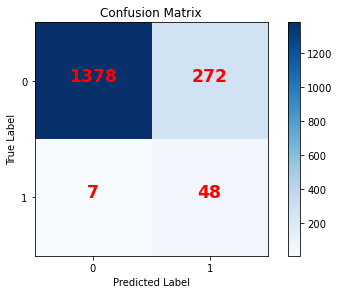

In [15]:
datasets = resample(df_train)
print(len(datasets))
dt_models = ensemble_decision_trees(datasets)
y_pred, y_pred_proba = predict_ensemble(dt_models,X_test, y_test)
#print(len(y_pred),y_pred)
#print(len(y_pred_proba),y_pred_proba)
print_evaluation_report(y_test, y_pred, y_pred_proba)

## Note: In our test case, there were 55 samples with  class "1" and all are predicted correctly. So we can say that if a company has tendency to get bankrupt, it has a very high chance to get predicted.